In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

file_url = "https://drive.google.com/uc?id=1Ls4Kp-VLRDt95DZ1BF7UJCOp-OqvNlzc"

# read to dataframe
df = pd.read_csv(file_url)
# preview rows
print(df.tail(3))

          temp   dryness       wind  history  risk
997  32.847851  0.768748  23.981364      5.0     1
998  20.222284  0.249795  10.565160      0.0     0
999  18.971856  0.386961  14.176749      0.0     0


In [3]:
# define features
x = df[['temp', 'dryness', 'wind', 'history']]
# define target variable
y = df['risk']
# split into training/test (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [4]:
# Create neural network with 4 neurons
model = MLPClassifier(hidden_layer_sizes=(4), max_iter = 1000, random_state = 1)
# fit model using training dataset
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=4, max_iter=1000, random_state=1)

In [5]:
# make predictions on test data set
y_pred = model.predict(x_test)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print results
print("Accuracy:", accuracy)

Accuracy: 0.97


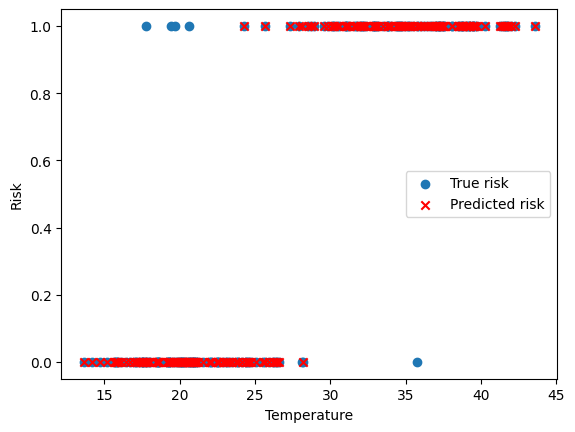

In [7]:
# visualize the model
plt.scatter(x_test['temp'], y_test, label = 'True risk', marker = 'o')
plt.scatter(x_test['temp'], y_pred, label = 'Predicted risk', marker = 'x', color = 'red')
# add more details
plt.xlabel('Temperature')
plt.ylabel('Risk')
plt.legend()